In [ ]:
!pip install gradio

     |████████████████████████████████| 1.7 MB 8.1 MB/s 
     |████████████████████████████████| 1.1 MB 44.6 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 255 kB 77.3 MB/s 
     |████████████████████████████████| 2.0 MB 38.2 MB/s 
     |████████████████████████████████| 211 kB 61.7 MB/s 
     |████████████████████████████████| 53 kB 1.3 MB/s 
     |████████████████████████████████| 271 kB 63.9 MB/s 
     |████████████████████████████████| 144 kB 60.6 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 10.9 MB 53.1 MB/s 
     |████████████████████████████████| 58 kB 7.7 MB/s 
     |████████████████████████████████| 79 kB 9.6 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 3.6 MB 37.4 MB/s 
     |████████████████████████████████| 856 kB 55.7 MB/s 
     |██████████████████████

In [ ]:
import gradio as gr
 
import matplotlib.pyplot as plt
import numpy as np
#import os
import PIL
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 1s 0us/step


[PosixPath('/root/.keras/datasets/flower_photos/roses/4918137796_21f0922b0c_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/14408977935_a397e796b8_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/14172324538_2147808483_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/19823402005_2db025dd66_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/218630974_5646dafc63_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/7525783408_0999483bf4_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/9406573080_60eab9278e_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/850416050_31b3ff7086.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/14573732424_1bb91e2e42_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/2215318403_06eb99176a.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/8032328803_30afac8b07_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/3550491463_3eb092054c_m.

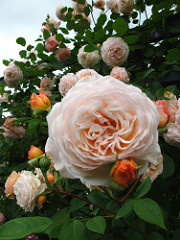

In [ ]:
roses = list(data_dir.glob('roses/*'))
print(roses)
PIL.Image.open(str(roses[1]))

In [ ]:
img_height,img_width=180,180
batch_size = 256
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle =True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  shuffle = True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


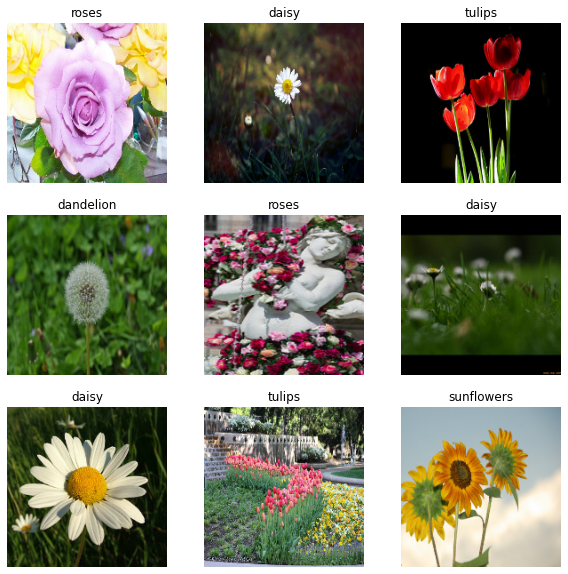

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 5
def build_model(optimizers):
  model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])
  model.compile(optimizer=optimizers,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  return model

The optimizer used is :  Adadelta
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 136s 10s/step - loss: 1.6161 - accuracy: 0.2047 - val_loss: 1.6104 - val_accuracy: 0.2180
Epoch 2/10
12/12 [==============================] - 123s 10s/step - loss: 1.6105 - accuracy: 0.2081 - val_loss: 1.6062 - val_accuracy: 0.2289
Epoch 3/10
12/12 [==============================] - 123s 10s/step - loss: 1.6057 - accuracy: 0.2115 - val_loss: 1.6026 - val_accuracy: 0.2262
Epoch 4/10
12/12 [==============================] - 128s 10s/step - loss: 1.6017 - accuracy: 0.2214 - val_loss: 1.5997 - val_accuracy: 0.2384
Epoch 5/10
12/12 [==============================] - 124s 10s/step - loss: 1.5982 - accuracy: 0.2282 - val_loss: 1.5975 - val_accuracy: 0.2384
Epoch 6/10
12/12 [==============================] - 125s 10s/step - loss: 1.5953 - accuracy: 0.2459 - val_loss: 1.5957 - val_accuracy: 0.2561
Epoch 7/10
12/12 [==============================] - 124s 10s/step - loss: 1.5931 - accuracy: 0.2592 - val_loss: 1.5940 - val_accuracy: 0.2657
Epoch 8/10
12/12 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 125s 10s/step - loss: 1.6156 - accuracy: 0.1812 - val_loss: 1.6040 - val_accuracy: 0.2221
Epoch 2/10
12/12 [==============================] - 126s 10s/step - loss: 1.6010 - accuracy: 0.2340 - val_loss: 1.5958 - val_accuracy: 0.2343
Epoch 3/10
12/12 [==============================] - 133s 10s/step - loss: 1.5945 - accuracy: 0.2520 - val_loss: 1.5897 - val_accuracy: 0.2493
Epoch 4/10
12/12 [==============================] - 129s 10s/step - loss: 1.5893 - accuracy: 0.2606 - val_loss: 1.5846 - val_accuracy: 0.3093
Epoch 5/10
12/12 [==============================] - 130s 10s/step - loss: 1.5847 - accuracy: 0.2953 - val_loss: 1.5806 - val_accuracy: 0.2997
Epoch 6/10
12/12 [==============================] - 129s 10s/step - loss: 1.5800 - accuracy: 0.3096 - val_loss: 1.5759 - val_accuracy: 0.3283
Epoch 7/10
12/12 [==============================] - 134s 11s/step - loss: 1.5755 - accuracy: 0.3161 - val_loss: 1.5717 - val_accuracy: 0.3324
Epoch 8/10
12/12 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 138s 11s/step - loss: 1.5935 - accuracy: 0.2878 - val_loss: 1.4220 - val_accuracy: 0.3924
Epoch 2/10
12/12 [==============================] - 130s 10s/step - loss: 1.3008 - accuracy: 0.4407 - val_loss: 1.2105 - val_accuracy: 0.4864
Epoch 3/10
12/12 [==============================] - 126s 10s/step - loss: 1.1476 - accuracy: 0.5068 - val_loss: 1.1215 - val_accuracy: 0.5422
Epoch 4/10
12/12 [==============================] - 126s 10s/step - loss: 1.0487 - accuracy: 0.5715 - val_loss: 1.0761 - val_accuracy: 0.5504
Epoch 5/10
12/12 [==============================] - 126s 10s/step - loss: 0.9893 - accuracy: 0.6029 - val_loss: 1.0012 - val_accuracy: 0.5858
Epoch 6/10
12/12 [==============================] - 133s 10s/step - loss: 0.9260 - accuracy: 0.6536 - val_loss: 1.0595 - val_accuracy: 0.5640
Epoch 7/10
12/12 [==============================] - 129s 10s/step - loss: 0.8884 - accuracy: 0.6686 - val_loss: 1.0139 - val_accuracy: 0.5817
Epoch 8/10
12/12 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 135s 10s/step - loss: 1.6992 - accuracy: 0.2725 - val_loss: 1.6349 - val_accuracy: 0.2629
Epoch 2/10
12/12 [==============================] - 123s 10s/step - loss: 1.4190 - accuracy: 0.4166 - val_loss: 1.2294 - val_accuracy: 0.5027
Epoch 3/10
12/12 [==============================] - 123s 10s/step - loss: 1.3074 - accuracy: 0.4581 - val_loss: 1.2093 - val_accuracy: 0.5531
Epoch 4/10
12/12 [==============================] - 135s 11s/step - loss: 1.1262 - accuracy: 0.5507 - val_loss: 1.2235 - val_accuracy: 0.5163
Epoch 5/10
12/12 [==============================] - 126s 10s/step - loss: 1.0934 - accuracy: 0.5644 - val_loss: 1.1319 - val_accuracy: 0.5354
Epoch 6/10
12/12 [==============================] - 123s 10s/step - loss: 1.0190 - accuracy: 0.5903 - val_loss: 1.1519 - val_accuracy: 0.5354
Epoch 7/10
12/12 [==============================] - 123s 10s/step - loss: 1.0293 - accuracy: 0.5991 - val_loss: 1.0900 - val_accuracy: 0.5708
Epoch 8/10
12/12 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 126s 10s/step - loss: 1.6039 - accuracy: 0.2309 - val_loss: 1.5911 - val_accuracy: 0.2779
Epoch 2/10
12/12 [==============================] - 123s 10s/step - loss: 1.5878 - accuracy: 0.2956 - val_loss: 1.5755 - val_accuracy: 0.3678
Epoch 3/10
12/12 [==============================] - 130s 11s/step - loss: 1.5731 - accuracy: 0.3396 - val_loss: 1.5603 - val_accuracy: 0.3678
Epoch 4/10
12/12 [==============================] - 125s 10s/step - loss: 1.5538 - accuracy: 0.3488 - val_loss: 1.5366 - val_accuracy: 0.3733
Epoch 5/10
12/12 [==============================] - 125s 10s/step - loss: 1.5276 - accuracy: 0.3624 - val_loss: 1.5073 - val_accuracy: 0.3951
Epoch 6/10
12/12 [==============================] - 125s 10s/step - loss: 1.4908 - accuracy: 0.3764 - val_loss: 1.4838 - val_accuracy: 0.3787
Epoch 7/10
12/12 [==============================] - 124s 10s/step - loss: 1.4498 - accuracy: 0.3794 - val_loss: 1.4360 - val_accuracy: 0.3937
Epoch 8/10
12/12 

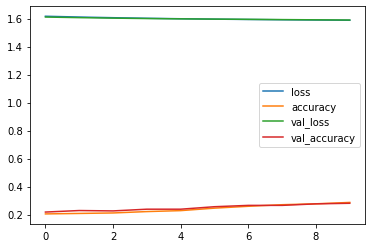

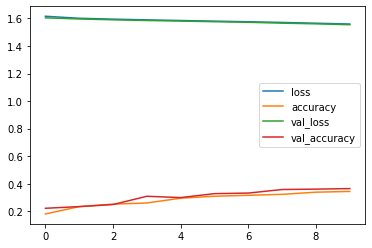

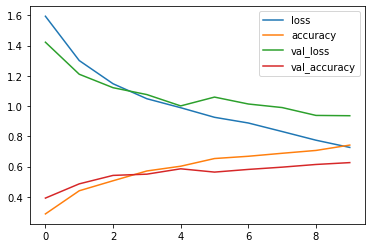

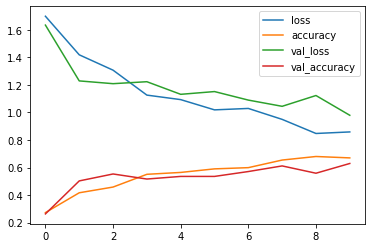

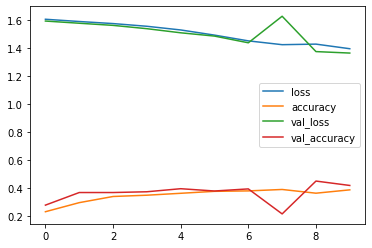

In [ ]:
import pandas as pd
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',mode = 'min',verbose = 1,patience = 5)
epochs=10
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
for i in optimizers:
  print("The optimizer used is : ",i)
  model = build_model(i)
  history = model.fit(train_ds,validation_data=val_ds, epochs=epochs, verbose=1,callbacks = [early_stop])
  loss = pd.DataFrame(model.history.history)
  print("(",i,"optimizer )")
  loss.plot()

In [ ]:
model = build_model(optimizers[0])

In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

In [ ]:
model.save("Image_Classification.h5")